In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[203.25 202.25 198.25]
   [199.   198.   194.  ]
   [201.   200.   196.  ]
   ...
   [125.75 120.75 117.75]
   [124.5  119.5  116.5 ]
   [123.   118.   115.  ]]

  [[195.5  194.5  190.5 ]
   [197.25 196.25 192.25]
   [201.75 200.75 196.75]
   ...
   [127.5  122.5  119.5 ]
   [121.5  116.5  113.5 ]
   [130.25 125.25 122.25]]

  [[192.25 191.25 187.25]
   [196.25 195.25 191.25]
   [201.25 200.25 196.25]
   ...
   [125.25 120.25 117.25]
   [122.25 117.25 114.25]
   [129.25 124.25 121.25]]

  ...

  [[195.5  193.5  194.5 ]
   [194.75 192.75 193.75]
   [195.75 193.75 194.75]
   ...
   [125.5  123.5  124.5 ]
   [126.25 124.25 125.25]
   [125.5  123.5  124.5 ]]

  [[197.25 195.25 196.25]
   [195.   193.   194.  ]
   [197.   195.   196.  ]
   ...
   [130.5  128.5  129.5 ]
   [120.5  118.5  119.5 ]
   [127.5  125.5  126.5 ]]

  [[192.25 190.25 191.25]
   [193.   191.   192.  ]
   [195.5  193.5  194.5 ]
   ...
   [134.   132.   133.  ]
   [121.25 119.25 120.25]
   [130.   128.   12

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [22]:
model.add(Dense(units=38,activation='softmax'))

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [25]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 200s 86ms/step - loss: 1.3381 - accuracy: 0.6094 - val_loss: 0.6196 - val_accuracy: 0.8065
Epoch 2/10
2197/2197 [==============================] - 186s 84ms/step - loss: 0.4347 - accuracy: 0.8631 - val_loss: 0.4015 - val_accuracy: 0.8701
Epoch 3/10
2197/2197 [==============================] - 184s 84ms/step - loss: 0.2650 - accuracy: 0.9151 - val_loss: 0.1906 - val_accuracy: 0.9380
Epoch 4/10
2197/2197 [==============================] - 184s 84ms/step - loss: 0.1858 - accuracy: 0.9385 - val_loss: 0.1960 - val_accuracy: 0.9369
Epoch 5/10
2197/2197 [==============================] - 185s 84ms/step - loss: 0.1348 - accuracy: 0.9558 - val_loss: 0.1311 - val_accuracy: 0.9578
Epoch 6/10
2197/2197 [==============================] - 185s 84ms/step - loss: 0.1039 - accuracy: 0.9655 - val_loss: 0.1391 - val_accuracy: 0.9542
Epoch 7/10
2197/2197 [==============================] - 185s 84ms/step - loss: 0.0855 - accuracy: 0.9720 - val_loss: 0

In [26]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 58s 26ms/step - loss: 0.0130 - accuracy: 0.9962


In [27]:
print(train_loss,train_acc)

0.012960273772478104 0.9961732625961304


In [28]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 15s 26ms/step - loss: 0.0922 - accuracy: 0.9735


In [29]:
print(val_loss,val_acc)

0.09219598770141602 0.9734805226325989


In [31]:
model.save("trained_model.keras")

In [32]:
training_history.history

{'loss': [1.3380677700042725,
  0.434680700302124,
  0.2649526298046112,
  0.18581333756446838,
  0.1348358690738678,
  0.10389705002307892,
  0.08547674119472504,
  0.07477805763483047,
  0.06077350676059723,
  0.05309830233454704],
 'accuracy': [0.6093605756759644,
  0.8631481528282166,
  0.9150864481925964,
  0.9385020136833191,
  0.9557578563690186,
  0.9655451774597168,
  0.9719894528388977,
  0.9754178524017334,
  0.9803115725517273,
  0.9829291105270386],
 'val_loss': [0.6196281909942627,
  0.40154123306274414,
  0.19056013226509094,
  0.1960040181875229,
  0.13106387853622437,
  0.1391144096851349,
  0.28446951508522034,
  0.1273396611213684,
  0.12572994828224182,
  0.09219594299793243],
 'val_accuracy': [0.806510329246521,
  0.8701342940330505,
  0.9380264282226562,
  0.9369451403617859,
  0.957773745059967,
  0.9541884660720825,
  0.9230594038963318,
  0.9596517086029053,
  0.9624402523040771,
  0.9734805226325989]}

In [33]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [36]:
training_history.history['accuracy']

[0.6093605756759644,
 0.8631481528282166,
 0.9150864481925964,
 0.9385020136833191,
 0.9557578563690186,
 0.9655451774597168,
 0.9719894528388977,
 0.9754178524017334,
 0.9803115725517273,
 0.9829291105270386]

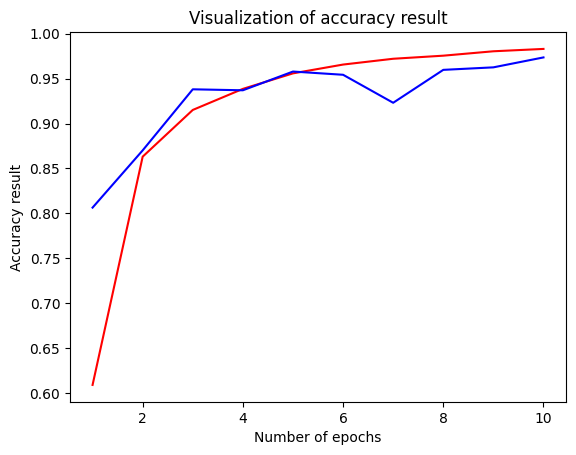

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

In [40]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [43]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 13s 24ms/step


(array([[1.0000000e+00, 1.6608652e-09, 1.4254697e-12, ..., 4.4598844e-19,
         8.5347447e-16, 4.3254601e-17],
        [9.9998057e-01, 1.6417235e-07, 8.2311065e-09, ..., 1.2902535e-11,
         6.9782419e-10, 7.5418971e-10],
        [1.0000000e+00, 3.3812575e-09, 2.4334385e-11, ..., 1.0129524e-18,
         3.8705845e-14, 1.7512544e-13],
        ...,
        [3.9403009e-10, 7.7657450e-13, 3.9830389e-10, ..., 1.0539392e-11,
         1.1192180e-10, 9.9999869e-01],
        [3.2435690e-10, 4.4539971e-13, 1.1864568e-10, ..., 3.3496907e-11,
         3.8269332e-11, 9.9999976e-01],
        [5.5282757e-17, 2.1306633e-19, 9.5655646e-18, ..., 1.6535119e-18,
         2.1266066e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [44]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [45]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
true_catgeroies=tf.concat([y for x,y in test_set],axis=0)
true_catgeroies

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [47]:
Y_true=tf.argmax(true_catgeroies,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
from sklearn.metrics import classification_report,confusion_matrix


In [49]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.98       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

In [53]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

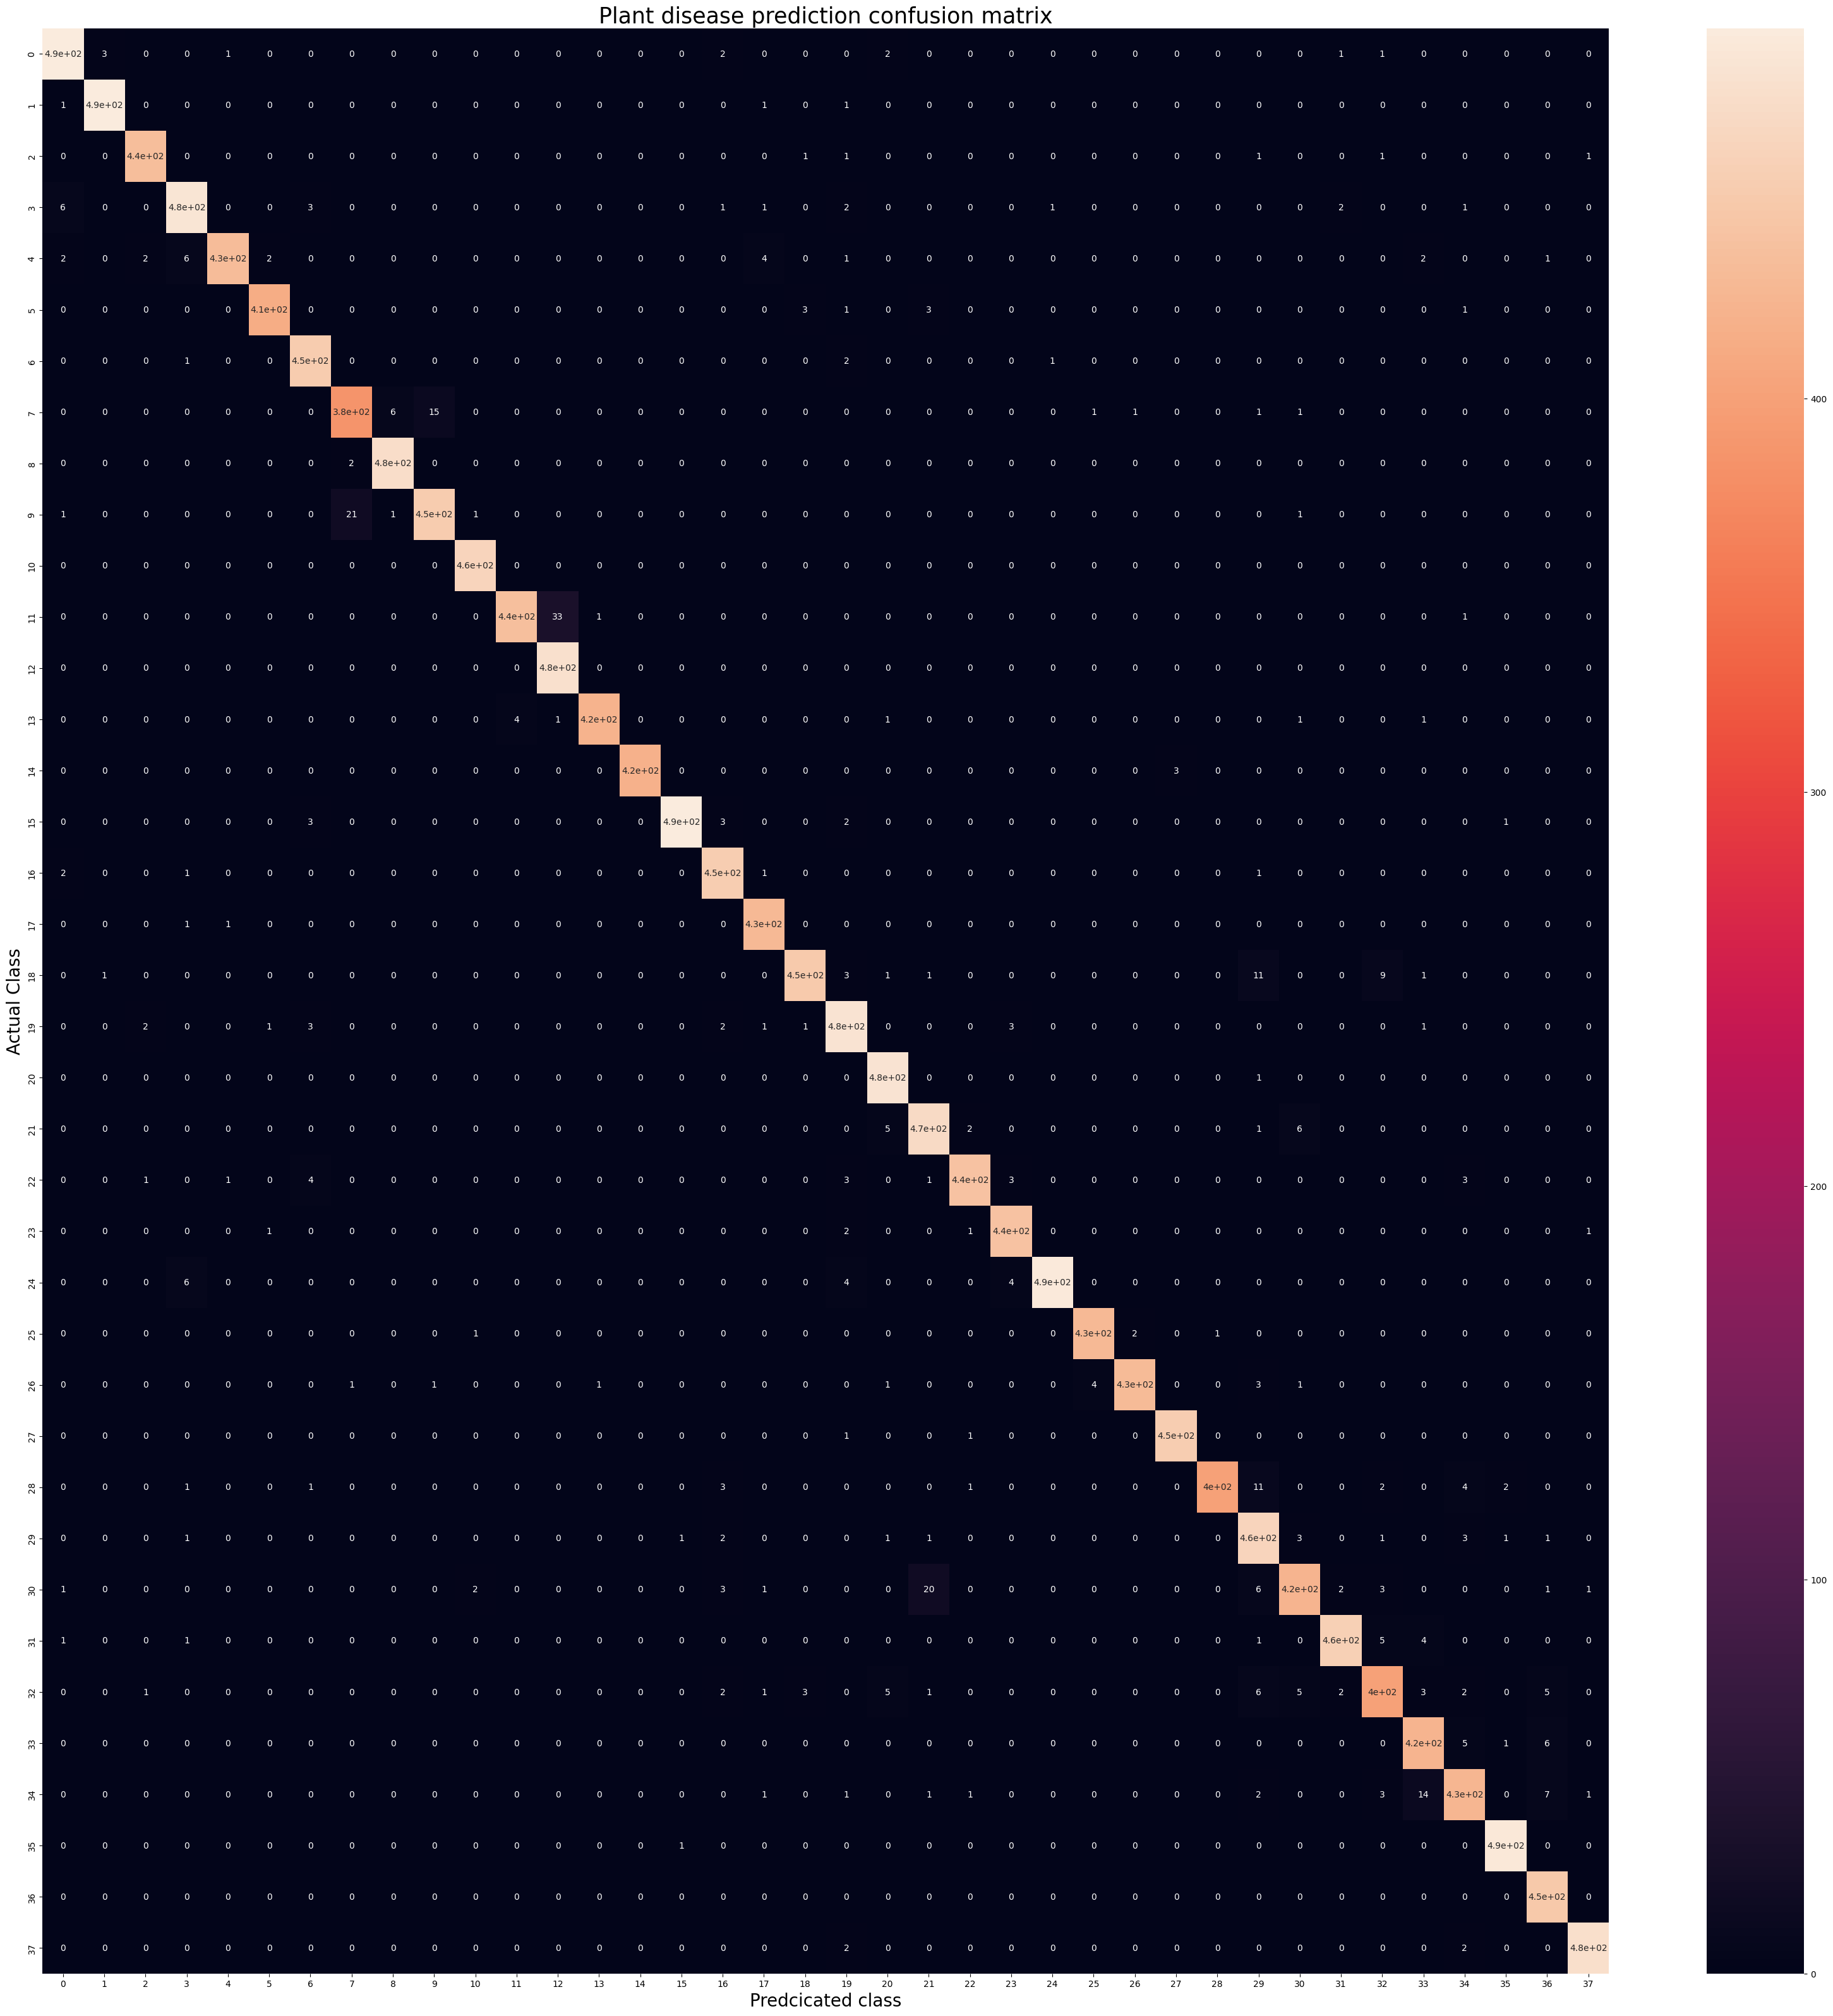

In [60]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True, annot_kws={'size':10})
plt.xlabel("Predcicated class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant disease prediction confusion matrix", fontsize=25)
plt.show()